In [1]:
import torch
from matplotlib import pyplot as plt
import numpy as np
import cv2

In [2]:
model = torch.hub.load('ultralytics/yolov5', 'yolov5s')

Using cache found in C:\Users\tanil/.cache\torch\hub\ultralytics_yolov5_master
YOLOv5  2024-6-25 Python-3.12.4 torch-2.3.1+cu121 CUDA:0 (NVIDIA GeForce RTX 3050 Ti Laptop GPU, 4096MiB)

Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 


In [3]:
model

AutoShape(
  (model): DetectMultiBackend(
    (model): DetectionModel(
      (model): Sequential(
        (0): Conv(
          (conv): Conv2d(3, 32, kernel_size=(6, 6), stride=(2, 2), padding=(2, 2))
          (act): SiLU(inplace=True)
        )
        (1): Conv(
          (conv): Conv2d(32, 64, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1))
          (act): SiLU(inplace=True)
        )
        (2): C3(
          (cv1): Conv(
            (conv): Conv2d(64, 32, kernel_size=(1, 1), stride=(1, 1))
            (act): SiLU(inplace=True)
          )
          (cv2): Conv(
            (conv): Conv2d(64, 32, kernel_size=(1, 1), stride=(1, 1))
            (act): SiLU(inplace=True)
          )
          (cv3): Conv(
            (conv): Conv2d(64, 64, kernel_size=(1, 1), stride=(1, 1))
            (act): SiLU(inplace=True)
          )
          (m): Sequential(
            (0): Bottleneck(
              (cv1): Conv(
                (conv): Conv2d(32, 32, kernel_size=(1, 1), stride=(1, 1))
  

In [3]:
import uuid
import os
import time

In [4]:
IMAGES_PATH = os.path.join("C:/Users/tanil/yolo/directions", "C:/Users/tanil/yolo/directions/images")
labels = ['right', 'left', 'up', 'down']
number_imgs = 5

In [5]:
cap = cv2.VideoCapture(0)
while  cap.isOpened():
    ret, frame = cap.read()
    if frame is None:
        continue
    results = model(frame)
    if results is None:
        continue
    cv2.imshow('YOLO', np.squeeze(results.render()))
    if cv2.waitKey(10) & 0xFF == ord('q'):
        break
cap.release()
cv2.destroyAllWindows()

In [6]:
cap = cv2.VideoCapture(0)
for label in labels:
    print('Collecting images for {}'.format(label))
    time.sleep(5)
    for img_num in range(number_imgs):
        print('Collecting images for {}, image number {}'.format(label, img_num))
        ret, frame = cap.read()
        imgname = os.path.join(IMAGES_PATH, label+'.'+str(uuid.uuid1())+'.jpg')
        cv2.imwrite(imgname, frame)
        cv2.imshow('Image Collection', frame)
        time.sleep(2)
        if cv2.waitKey(10) & 0xFF == ('q'):
            break
cap.release()
cv2.destroyAllWindows()

In [7]:
!pip install pyqt5 lxml --upgrade
!cd labelImg && pyrcc5 -o libs/resources.py resources.qrc


[notice] A new release of pip is available: 24.1 -> 24.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [8]:
!python.exe -m pip install --upgrade pip

   ---------------------------------------- 0.0/1.8 MB ? eta -:--:--
    --------------------------------------- 0.0/1.8 MB 1.4 MB/s eta 0:00:02
   - -------------------------------------- 0.1/1.8 MB 1.7 MB/s eta 0:00:02
   - -------------------------------------- 0.1/1.8 MB 1.7 MB/s eta 0:00:02
   ---- ----------------------------------- 0.2/1.8 MB 1.4 MB/s eta 0:00:02
   ---- ----------------------------------- 0.2/1.8 MB 1.4 MB/s eta 0:00:02
   ---- ----------------------------------- 0.2/1.8 MB 1.4 MB/s eta 0:00:02
   ---- ----------------------------------- 0.2/1.8 MB 1.4 MB/s eta 0:00:02
   ------ --------------------------------- 0.3/1.8 MB 803.7 kB/s eta 0:00:02
   ------------ --------------------------- 0.6/1.8 MB 1.4 MB/s eta 0:00:01
   ------------------ --------------------- 0.9/1.8 MB 1.9 MB/s eta 0:00:01
   ----------------------- ---------------- 1.1/1.8 MB 2.2 MB/s eta 0:00:01
   -------------------------------- ------- 1.5/1.8 MB 2.8 MB/s eta 0:00:01
   --------------

In [9]:
!pip install pyqt5 lxml --upgrade
!cd labelImg && pyrcc5 -o libs/resources.py resources.qrc

In [11]:
!cd yolov5 && python train.py --img 320 --batch 16 --epochs 500 --data database.yaml --weights yolov5s.pt --workers 2

train: weights=yolov5s.pt, cfg=, data=database.yaml, hyp=data\hyps\hyp.scratch-low.yaml, epochs=500, batch_size=16, imgsz=320, rect=False, resume=False, nosave=False, noval=False, noautoanchor=False, noplots=False, evolve=None, evolve_population=data\hyps, resume_evolve=None, bucket=, cache=None, image_weights=False, device=, multi_scale=False, single_cls=False, optimizer=SGD, sync_bn=False, workers=2, project=runs\train, name=exp, exist_ok=False, quad=False, cos_lr=False, label_smoothing=0.0, patience=100, freeze=[0], save_period=-1, seed=0, local_rank=-1, entity=None, upload_dataset=False, bbox_interval=-1, artifact_alias=latest, ndjson_console=False, ndjson_file=False
github:  YOLOv5 is out of date by 3 commits. Use 'git pull' or 'git clone https://github.com/ultralytics/yolov5' to update.
YOLOv5  v7.0-331-gab364c98 Python-3.12.4 torch-2.3.1+cu121 CUDA:0 (NVIDIA GeForce RTX 3050 Ti Laptop GPU, 4096MiB)

hyperparameters: lr0=0.01, lrf=0.01, momentum=0.937, weight_decay=0.0005, warmup

In [12]:
model = torch.hub.load('ultralytics/yolov5', 'custom', path='yolov5/runs/train/exp5/weights/last.pt', force_reload=True)

Downloading: "https://github.com/ultralytics/yolov5/zipball/master" to C:\Users\tanil/.cache\torch\hub\master.zip
YOLOv5  2024-7-2 Python-3.12.4 torch-2.3.1+cu121 CUDA:0 (NVIDIA GeForce RTX 3050 Ti Laptop GPU, 4096MiB)

Fusing layers... 
Model summary: 157 layers, 7061368 parameters, 0 gradients, 15.9 GFLOPs
Adding AutoShape... 


In [13]:
img = os.path.join("C:Users/tanil/yolo/directions", "C:/Users/tanil/yolo/directions/images", "C:/Users/tanil/yolo/directions/images/down.979f895f-385b-11ef-bfba-e8d5ab0add49.jpg")

In [14]:
results = model(img)

In [15]:
results.print()

image 1/1: 480x640 1 down
Speed: 59.8ms pre-process, 14.0ms inference, 62.2ms NMS per image at shape (1, 3, 480, 640)


<function matplotlib.pyplot.show(close=None, block=None)>

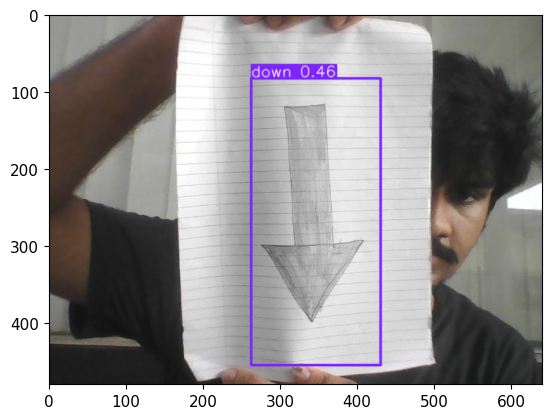

In [16]:
%matplotlib inline
plt.imshow(np.squeeze(results.render()))
plt.show

In [18]:
cap = cv2.VideoCapture(0)
while  cap.isOpened():
    ret, frame = cap.read()
    if frame is None:
        continue
    results = model(frame)
    if results is None:
        continue
    cv2.imshow('YOLO', np.squeeze(results.render()))
    if cv2.waitKey(10) & 0xFF == ord('q'):
        break
cap.release()
cv2.destroyAllWindows()